# Import Libraries

In [2]:
pip install researchpy==0.2.3

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pandas-profiling

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [214]:
!pip3 install xgboost

In [216]:
!pip install lightgbm

In [306]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import researchpy as rp
from pandas_profiling import ProfileReport
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import plotly.express as px
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import  accuracy_score, f1_score, precision_score,confusion_matrix, recall_score, roc_auc_score
from matplotlib import rc,rcParams
import itertools
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, precision_recall_curve, roc_curve, auc, average_precision_score

# Read & Check Data

In [6]:
data = pd.read_csv('term-deposit-marketing-2020.csv')

In [7]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


In [8]:
data.shape

(40000, 14)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


In [10]:
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
y            0
dtype: int64

Pandas Report File

In [11]:
profile = ProfileReport(data, title = 'Profil Report')
profile.to_file('report.html')

In [12]:
def bar_plot(df_col):
    print(df_col.value_counts())
    plt.figure(figsize=(10,6))
    sns.barplot(x=df_col.value_counts(),y=df_col.unique())

*Note : IMBALANCE DATASET*

no     37104
yes     2896
Name: y, dtype: int64


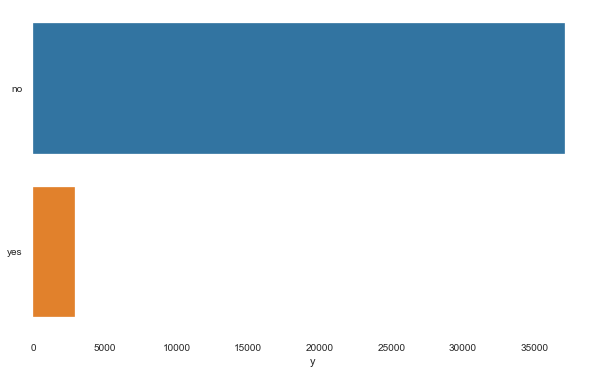

In [13]:
bar_plot(data.y)

blue-collar      9383
management       8166
technician       6852
admin            4483
services         3910
retired          1437
self-employed    1414
entrepreneur     1405
unemployed       1104
housemaid        1087
student           524
unknown           235
Name: job, dtype: int64


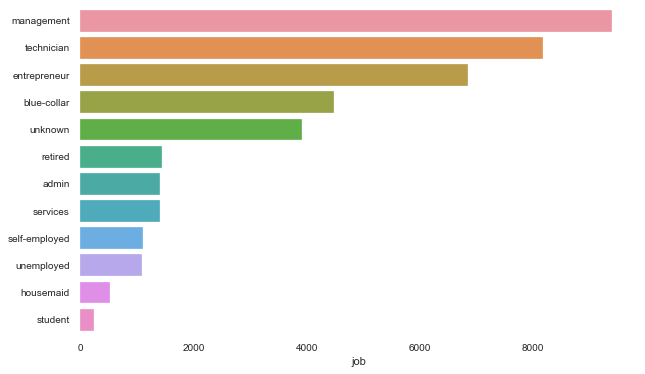

In [14]:
bar_plot(data.job)

married     24386
single      10889
divorced     4725
Name: marital, dtype: int64


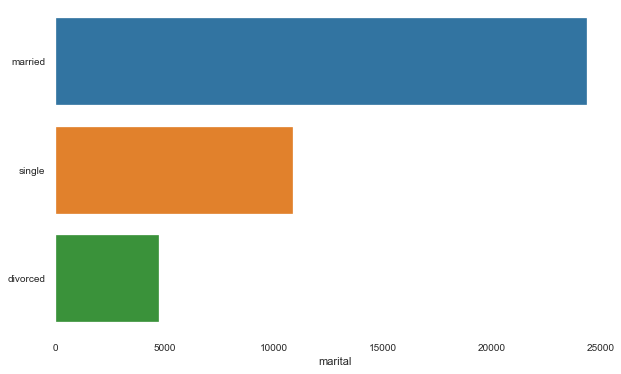

In [15]:
bar_plot(data.marital)

secondary    20993
tertiary     11206
primary       6270
unknown       1531
Name: education, dtype: int64


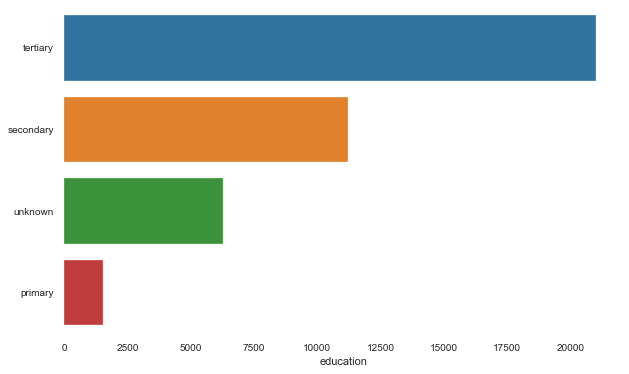

In [16]:
bar_plot(data.education)

no     39191
yes      809
Name: default, dtype: int64


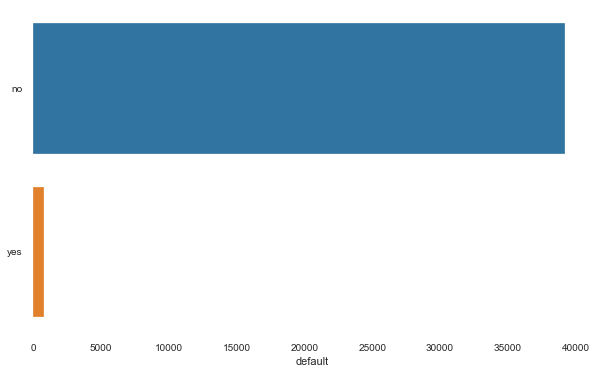

In [17]:
bar_plot(data.default)

yes    24031
no     15969
Name: housing, dtype: int64


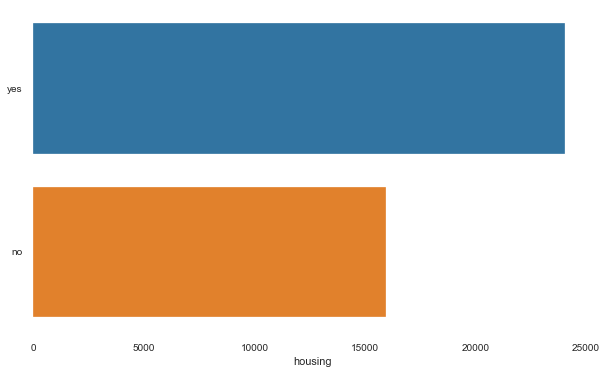

In [18]:
bar_plot(data.housing)

no     33070
yes     6930
Name: loan, dtype: int64


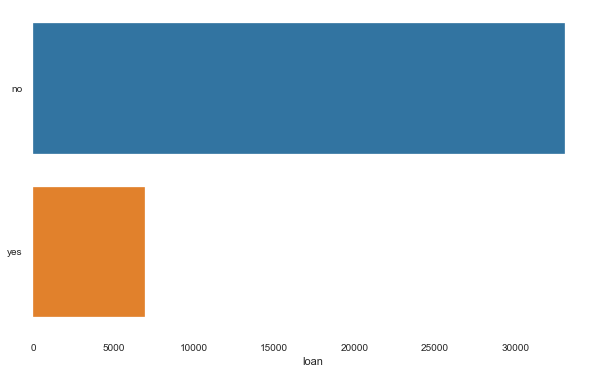

In [19]:
bar_plot(data.loan)

cellular     24914
unknown      12765
telephone     2321
Name: contact, dtype: int64


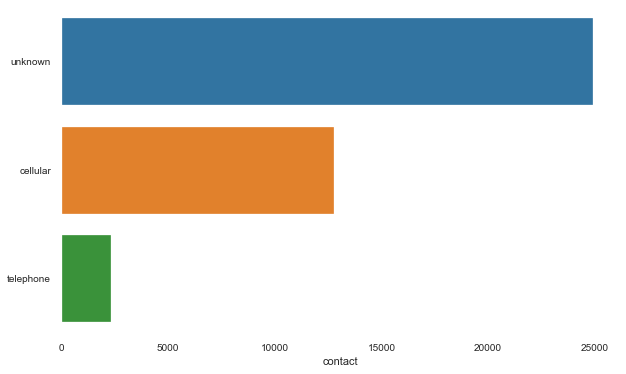

In [20]:
bar_plot(data.contact)

may    13532
jul     6380
aug     5215
jun     4734
nov     3598
apr     2718
feb     2296
jan     1176
mar      258
oct       80
dec       13
Name: month, dtype: int64


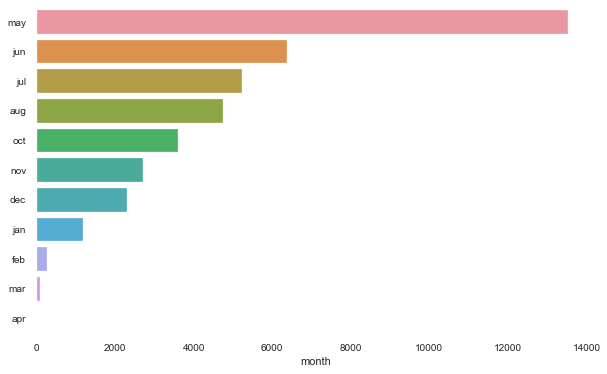

In [21]:
bar_plot(data.month)

In [22]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,40000.0,40.544600,9.641776,19.0,33.0,39.0,48.0,95.0
balance,40000.0,1274.277550,2903.769716,-8019.0,54.0,407.0,1319.0,102127.0
day,40000.0,16.017225,8.278127,1.0,8.0,17.0,21.0,31.0
duration,40000.0,254.824300,259.366498,0.0,100.0,175.0,313.0,4918.0
campaign,40000.0,2.882175,3.239051,1.0,1.0,2.0,3.0,63.0


# Preprecossing

Education 

In [23]:
data.education.value_counts()

secondary    20993
tertiary     11206
primary       6270
unknown       1531
Name: education, dtype: int64

In [24]:
data.education.value_counts().sum()

40000

In [25]:
secondary_count=0
tertiary_count=0
primary_count=0
unknown_count=0
for i in data.education:
    if i == 'secondary': 
        secondary_count += 1
    elif i == 'tertiary': 
        tertiary_count += 1
    elif i == 'primary': 
        primary_count += 1
    elif i == 'unknown': 
        unknown_count += 1
print("{} count = {}".format("secondary", secondary_count))
print("{} count = {}".format("tertiary", tertiary_count))
print("{} count = {}".format("primary", primary_count))
print("{} count = {}".format("unknown", unknown_count))

secondary count = 20993
tertiary count = 11206
primary count = 6270
unknown count = 1531


In [27]:
non_null_values = data.education.value_counts().sum() - unknown_count
non_null_values

38469

In [28]:
secondary_percent = secondary_count/non_null_values
tertiary_percent = tertiary_count/non_null_values
primary_percent = primary_count/non_null_values
print("secondary percent : ", secondary_percent)
print("tertiary percent : ", tertiary_percent)
print("primary percent : ", primary_percent)

secondary percent :  0.5457121318464218
tertiary percent :  0.2912994878993475
primary percent :  0.16298838025423068


In [29]:
data2=data
data2['count'] = 0
data2 = data2.groupby('education')['count'].agg('count')
data2.head()

education
primary       6270
secondary    20993
tertiary     11206
unknown       1531
Name: count, dtype: int64

In [30]:
data2.index.tolist()

['primary', 'secondary', 'tertiary', 'unknown']

In [31]:
list(data2)

[6270, 20993, 11206, 1531]

In [32]:
data.shape

(40000, 15)

In [33]:
howmany_secondary_imp = int(unknown_count * secondary_percent)
howmany_tertiary_imp = int(unknown_count * tertiary_percent)
howmany_primary_imp = int(unknown_count * primary_percent)
if unknown_count - (howmany_secondary_imp + howmany_tertiary_imp + howmany_primary_imp) !=0 :
    eks = unknown_count - (howmany_secondary_imp + howmany_tertiary_imp + howmany_primary_imp)
    howmany_secondary_imp = howmany_secondary_imp + eks
print("secodnary imp : {}"  .format(howmany_secondary_imp))
print("tertiary imp : {}"  .format(howmany_tertiary_imp))
print("primary imp : {}"  .format(howmany_primary_imp))

secodnary imp : 837
tertiary imp : 445
primary imp : 249


In [34]:
data.education.value_counts()

secondary    20993
tertiary     11206
primary       6270
unknown       1531
Name: education, dtype: int64

In [35]:
for_count=0
for i in data.education.index:
    if data.education[i]=='unknown':
        if for_count >=0 and for_count<837:
            data['education'][i]='secondary'
            for_count = for_count+1
        elif for_count >=837 and for_count<1282:
            data['education'][i]='tertiary'
            for_count = for_count+1
        elif for_count >=1282:
            data['education'][i]='primary'
            for_count = for_count+1

<ipython-input-35-0a04806e2e49>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['education'][i]='secondary'
<ipython-input-35-0a04806e2e49>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['education'][i]='tertiary'
<ipython-input-35-0a04806e2e49>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['education'][i]='primary'


In [36]:
data.education.unique()

array(['tertiary', 'secondary', 'primary'], dtype=object)

In [37]:
data.education.value_counts()

secondary    21830
tertiary     11651
primary       6519
Name: education, dtype: int64

Job

In [38]:
data.job.replace('unknown',np.nan,inplace=True)

In [39]:
data.job.dropna(axis=0,inplace=True)

default

In [40]:
data.drop('default',axis=1,inplace=True)

Target Encoding

In [41]:
le = preprocessing.LabelEncoder()
data.y = le.fit_transform(data.y)

Categorical Encoding

In [42]:
le2 = preprocessing.LabelEncoder()
data.housing = le2.fit_transform(data.housing)

In [43]:
le3 = preprocessing.LabelEncoder()
data.loan = le3.fit_transform(data.loan)

In [44]:
categorical_columns=['job','marital','education','contact','month']
for col in categorical_columns:
    X_encoded=pd.get_dummies(data[col], prefix_sep='_')
    data = data.drop([col],axis=1)
    
data = pd.concat([data,X_encoded],axis=1)

# Train - Test Split

In [45]:
y = data.y
X = data.drop('y',axis=1)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=6)

Scaling

In [47]:
scaler = StandardScaler()
scaler.fit(X_train)
scaler.fit(X_test)

StandardScaler()

# Catboost Classifier

In [54]:
model = CatBoostClassifier()
model.fit(X_train, y_train)

Learning rate set to 0.045252
0:	learn: 0.6289837	total: 93.6ms	remaining: 1m 33s
1:	learn: 0.5645730	total: 104ms	remaining: 52.1s
2:	learn: 0.5159938	total: 114ms	remaining: 37.8s
3:	learn: 0.4704640	total: 124ms	remaining: 30.8s
4:	learn: 0.4330743	total: 134ms	remaining: 26.7s
5:	learn: 0.4007290	total: 145ms	remaining: 24s
6:	learn: 0.3760727	total: 157ms	remaining: 22.3s
7:	learn: 0.3492095	total: 172ms	remaining: 21.3s
8:	learn: 0.3257570	total: 182ms	remaining: 20.1s
9:	learn: 0.3116921	total: 193ms	remaining: 19.1s
10:	learn: 0.2943501	total: 207ms	remaining: 18.6s
11:	learn: 0.2777617	total: 218ms	remaining: 17.9s
12:	learn: 0.2672050	total: 228ms	remaining: 17.3s
13:	learn: 0.2559836	total: 238ms	remaining: 16.8s
14:	learn: 0.2462240	total: 249ms	remaining: 16.3s
15:	learn: 0.2365516	total: 259ms	remaining: 15.9s
16:	learn: 0.2285768	total: 269ms	remaining: 15.6s
17:	learn: 0.2207334	total: 281ms	remaining: 15.3s
18:	learn: 0.2149186	total: 292ms	remaining: 15.1s
19:	learn: 

169:	learn: 0.1357397	total: 2.18s	remaining: 10.7s
170:	learn: 0.1356982	total: 2.19s	remaining: 10.6s
171:	learn: 0.1355668	total: 2.21s	remaining: 10.6s
172:	learn: 0.1354216	total: 2.22s	remaining: 10.6s
173:	learn: 0.1353306	total: 2.23s	remaining: 10.6s
174:	learn: 0.1352517	total: 2.24s	remaining: 10.6s
175:	learn: 0.1351192	total: 2.26s	remaining: 10.6s
176:	learn: 0.1350775	total: 2.27s	remaining: 10.5s
177:	learn: 0.1349332	total: 2.28s	remaining: 10.5s
178:	learn: 0.1348325	total: 2.29s	remaining: 10.5s
179:	learn: 0.1347412	total: 2.3s	remaining: 10.5s
180:	learn: 0.1346417	total: 2.31s	remaining: 10.5s
181:	learn: 0.1345567	total: 2.33s	remaining: 10.5s
182:	learn: 0.1344369	total: 2.34s	remaining: 10.4s
183:	learn: 0.1343562	total: 2.35s	remaining: 10.4s
184:	learn: 0.1342619	total: 2.36s	remaining: 10.4s
185:	learn: 0.1342104	total: 2.38s	remaining: 10.4s
186:	learn: 0.1341390	total: 2.39s	remaining: 10.4s
187:	learn: 0.1340782	total: 2.4s	remaining: 10.4s
188:	learn: 0.

339:	learn: 0.1256119	total: 4.19s	remaining: 8.14s
340:	learn: 0.1256071	total: 4.21s	remaining: 8.13s
341:	learn: 0.1255494	total: 4.22s	remaining: 8.11s
342:	learn: 0.1254900	total: 4.23s	remaining: 8.1s
343:	learn: 0.1253867	total: 4.24s	remaining: 8.09s
344:	learn: 0.1253841	total: 4.25s	remaining: 8.07s
345:	learn: 0.1253085	total: 4.26s	remaining: 8.06s
346:	learn: 0.1252281	total: 4.28s	remaining: 8.05s
347:	learn: 0.1251749	total: 4.29s	remaining: 8.03s
348:	learn: 0.1251189	total: 4.3s	remaining: 8.02s
349:	learn: 0.1250496	total: 4.31s	remaining: 8.01s
350:	learn: 0.1250031	total: 4.32s	remaining: 7.99s
351:	learn: 0.1249388	total: 4.33s	remaining: 7.98s
352:	learn: 0.1248613	total: 4.35s	remaining: 7.96s
353:	learn: 0.1247945	total: 4.36s	remaining: 7.95s
354:	learn: 0.1247505	total: 4.37s	remaining: 7.94s
355:	learn: 0.1247021	total: 4.38s	remaining: 7.93s
356:	learn: 0.1246516	total: 4.39s	remaining: 7.92s
357:	learn: 0.1245647	total: 4.41s	remaining: 7.9s
358:	learn: 0.1

502:	learn: 0.1179990	total: 6.18s	remaining: 6.11s
503:	learn: 0.1179653	total: 6.2s	remaining: 6.1s
504:	learn: 0.1178935	total: 6.21s	remaining: 6.09s
505:	learn: 0.1178339	total: 6.23s	remaining: 6.08s
506:	learn: 0.1178040	total: 6.24s	remaining: 6.07s
507:	learn: 0.1177578	total: 6.25s	remaining: 6.05s
508:	learn: 0.1177252	total: 6.26s	remaining: 6.04s
509:	learn: 0.1176988	total: 6.27s	remaining: 6.03s
510:	learn: 0.1176670	total: 6.29s	remaining: 6.02s
511:	learn: 0.1176408	total: 6.3s	remaining: 6s
512:	learn: 0.1176120	total: 6.31s	remaining: 5.99s
513:	learn: 0.1175986	total: 6.32s	remaining: 5.98s
514:	learn: 0.1175592	total: 6.33s	remaining: 5.96s
515:	learn: 0.1175293	total: 6.34s	remaining: 5.95s
516:	learn: 0.1174687	total: 6.36s	remaining: 5.94s
517:	learn: 0.1174079	total: 6.37s	remaining: 5.93s
518:	learn: 0.1173792	total: 6.38s	remaining: 5.92s
519:	learn: 0.1173591	total: 6.4s	remaining: 5.9s
520:	learn: 0.1173297	total: 6.41s	remaining: 5.89s
521:	learn: 0.117289

671:	learn: 0.1116069	total: 8.36s	remaining: 4.08s
672:	learn: 0.1115885	total: 8.37s	remaining: 4.07s
673:	learn: 0.1115703	total: 8.38s	remaining: 4.05s
674:	learn: 0.1115405	total: 8.39s	remaining: 4.04s
675:	learn: 0.1114960	total: 8.41s	remaining: 4.03s
676:	learn: 0.1114881	total: 8.42s	remaining: 4.02s
677:	learn: 0.1114742	total: 8.43s	remaining: 4s
678:	learn: 0.1114503	total: 8.45s	remaining: 3.99s
679:	learn: 0.1114061	total: 8.46s	remaining: 3.98s
680:	learn: 0.1113815	total: 8.47s	remaining: 3.97s
681:	learn: 0.1113699	total: 8.48s	remaining: 3.96s
682:	learn: 0.1113411	total: 8.5s	remaining: 3.94s
683:	learn: 0.1113203	total: 8.51s	remaining: 3.93s
684:	learn: 0.1112934	total: 8.52s	remaining: 3.92s
685:	learn: 0.1112529	total: 8.53s	remaining: 3.91s
686:	learn: 0.1112227	total: 8.55s	remaining: 3.89s
687:	learn: 0.1111644	total: 8.56s	remaining: 3.88s
688:	learn: 0.1111169	total: 8.57s	remaining: 3.87s
689:	learn: 0.1110859	total: 8.59s	remaining: 3.86s
690:	learn: 0.11

834:	learn: 0.1059872	total: 10.4s	remaining: 2.05s
835:	learn: 0.1059647	total: 10.4s	remaining: 2.04s
836:	learn: 0.1059424	total: 10.4s	remaining: 2.02s
837:	learn: 0.1059213	total: 10.4s	remaining: 2.01s
838:	learn: 0.1058820	total: 10.4s	remaining: 2s
839:	learn: 0.1058580	total: 10.4s	remaining: 1.99s
840:	learn: 0.1058067	total: 10.5s	remaining: 1.98s
841:	learn: 0.1057591	total: 10.5s	remaining: 1.97s
842:	learn: 0.1057299	total: 10.5s	remaining: 1.95s
843:	learn: 0.1057011	total: 10.5s	remaining: 1.94s
844:	learn: 0.1056749	total: 10.5s	remaining: 1.93s
845:	learn: 0.1056376	total: 10.5s	remaining: 1.92s
846:	learn: 0.1055988	total: 10.5s	remaining: 1.91s
847:	learn: 0.1055660	total: 10.6s	remaining: 1.89s
848:	learn: 0.1055428	total: 10.6s	remaining: 1.88s
849:	learn: 0.1054888	total: 10.6s	remaining: 1.87s
850:	learn: 0.1054278	total: 10.6s	remaining: 1.86s
851:	learn: 0.1053935	total: 10.6s	remaining: 1.85s
852:	learn: 0.1053662	total: 10.6s	remaining: 1.83s
853:	learn: 0.1

In [55]:
accuracies = cross_val_score(estimator=model,X= X_train, y= y_train, cv=5)

Learning rate set to 0.041139
0:	learn: 0.6346675	total: 10.6ms	remaining: 10.6s
1:	learn: 0.5749377	total: 21.8ms	remaining: 10.9s
2:	learn: 0.5295315	total: 33.5ms	remaining: 11.1s
3:	learn: 0.4858372	total: 48.3ms	remaining: 12s
4:	learn: 0.4493934	total: 60.4ms	remaining: 12s
5:	learn: 0.4175169	total: 72.6ms	remaining: 12s
6:	learn: 0.3931913	total: 85.3ms	remaining: 12.1s
7:	learn: 0.3661136	total: 97.8ms	remaining: 12.1s
8:	learn: 0.3421634	total: 110ms	remaining: 12.1s
9:	learn: 0.3275848	total: 121ms	remaining: 12s
10:	learn: 0.3102905	total: 133ms	remaining: 12s
11:	learn: 0.2934722	total: 145ms	remaining: 11.9s
12:	learn: 0.2816066	total: 155ms	remaining: 11.8s
13:	learn: 0.2696086	total: 166ms	remaining: 11.7s
14:	learn: 0.2590126	total: 178ms	remaining: 11.7s
15:	learn: 0.2486000	total: 190ms	remaining: 11.7s
16:	learn: 0.2395542	total: 207ms	remaining: 12s
17:	learn: 0.2325008	total: 219ms	remaining: 11.9s
18:	learn: 0.2258472	total: 231ms	remaining: 11.9s
19:	learn: 0.21

161:	learn: 0.1364603	total: 2s	remaining: 10.4s
162:	learn: 0.1363759	total: 2.02s	remaining: 10.3s
163:	learn: 0.1362951	total: 2.03s	remaining: 10.3s
164:	learn: 0.1362307	total: 2.04s	remaining: 10.3s
165:	learn: 0.1361862	total: 2.05s	remaining: 10.3s
166:	learn: 0.1361029	total: 2.06s	remaining: 10.3s
167:	learn: 0.1360265	total: 2.07s	remaining: 10.3s
168:	learn: 0.1357537	total: 2.08s	remaining: 10.2s
169:	learn: 0.1357037	total: 2.09s	remaining: 10.2s
170:	learn: 0.1356001	total: 2.1s	remaining: 10.2s
171:	learn: 0.1355274	total: 2.11s	remaining: 10.2s
172:	learn: 0.1354773	total: 2.13s	remaining: 10.2s
173:	learn: 0.1354384	total: 2.14s	remaining: 10.1s
174:	learn: 0.1353182	total: 2.15s	remaining: 10.1s
175:	learn: 0.1351950	total: 2.16s	remaining: 10.1s
176:	learn: 0.1350604	total: 2.17s	remaining: 10.1s
177:	learn: 0.1349116	total: 2.18s	remaining: 10.1s
178:	learn: 0.1348223	total: 2.19s	remaining: 10.1s
179:	learn: 0.1347001	total: 2.21s	remaining: 10s
180:	learn: 0.1345

324:	learn: 0.1250435	total: 3.87s	remaining: 8.04s
325:	learn: 0.1250060	total: 3.88s	remaining: 8.03s
326:	learn: 0.1249667	total: 3.89s	remaining: 8.02s
327:	learn: 0.1249466	total: 3.91s	remaining: 8s
328:	learn: 0.1248966	total: 3.92s	remaining: 7.99s
329:	learn: 0.1248936	total: 3.93s	remaining: 7.98s
330:	learn: 0.1248907	total: 3.94s	remaining: 7.96s
331:	learn: 0.1248769	total: 3.95s	remaining: 7.95s
332:	learn: 0.1248183	total: 3.96s	remaining: 7.94s
333:	learn: 0.1247808	total: 3.98s	remaining: 7.93s
334:	learn: 0.1247482	total: 3.99s	remaining: 7.92s
335:	learn: 0.1246723	total: 4s	remaining: 7.9s
336:	learn: 0.1246417	total: 4.01s	remaining: 7.9s
337:	learn: 0.1245706	total: 4.03s	remaining: 7.89s
338:	learn: 0.1245137	total: 4.04s	remaining: 7.88s
339:	learn: 0.1244211	total: 4.06s	remaining: 7.88s
340:	learn: 0.1243669	total: 4.07s	remaining: 7.87s
341:	learn: 0.1243642	total: 4.08s	remaining: 7.85s
342:	learn: 0.1243465	total: 4.09s	remaining: 7.84s
343:	learn: 0.124292

493:	learn: 0.1166480	total: 5.88s	remaining: 6.02s
494:	learn: 0.1166089	total: 5.89s	remaining: 6.01s
495:	learn: 0.1165530	total: 5.9s	remaining: 6s
496:	learn: 0.1165193	total: 5.91s	remaining: 5.98s
497:	learn: 0.1164637	total: 5.92s	remaining: 5.97s
498:	learn: 0.1164433	total: 5.93s	remaining: 5.96s
499:	learn: 0.1164229	total: 5.95s	remaining: 5.95s
500:	learn: 0.1163809	total: 5.96s	remaining: 5.93s
501:	learn: 0.1163375	total: 5.97s	remaining: 5.92s
502:	learn: 0.1162999	total: 5.98s	remaining: 5.91s
503:	learn: 0.1162665	total: 5.99s	remaining: 5.9s
504:	learn: 0.1162419	total: 6s	remaining: 5.88s
505:	learn: 0.1162101	total: 6.01s	remaining: 5.87s
506:	learn: 0.1161987	total: 6.02s	remaining: 5.86s
507:	learn: 0.1161165	total: 6.04s	remaining: 5.85s
508:	learn: 0.1160805	total: 6.05s	remaining: 5.83s
509:	learn: 0.1160000	total: 6.06s	remaining: 5.82s
510:	learn: 0.1159485	total: 6.07s	remaining: 5.81s
511:	learn: 0.1159236	total: 6.08s	remaining: 5.8s
512:	learn: 0.1159019

667:	learn: 0.1096509	total: 7.9s	remaining: 3.92s
668:	learn: 0.1096071	total: 7.91s	remaining: 3.91s
669:	learn: 0.1095411	total: 7.92s	remaining: 3.9s
670:	learn: 0.1095210	total: 7.93s	remaining: 3.89s
671:	learn: 0.1094872	total: 7.95s	remaining: 3.88s
672:	learn: 0.1094393	total: 7.96s	remaining: 3.87s
673:	learn: 0.1093804	total: 7.97s	remaining: 3.85s
674:	learn: 0.1093469	total: 7.98s	remaining: 3.84s
675:	learn: 0.1093183	total: 7.99s	remaining: 3.83s
676:	learn: 0.1092578	total: 8s	remaining: 3.82s
677:	learn: 0.1092193	total: 8.01s	remaining: 3.81s
678:	learn: 0.1092023	total: 8.02s	remaining: 3.79s
679:	learn: 0.1091401	total: 8.04s	remaining: 3.78s
680:	learn: 0.1090957	total: 8.05s	remaining: 3.77s
681:	learn: 0.1090597	total: 8.06s	remaining: 3.76s
682:	learn: 0.1090167	total: 8.07s	remaining: 3.75s
683:	learn: 0.1089719	total: 8.09s	remaining: 3.73s
684:	learn: 0.1089453	total: 8.1s	remaining: 3.72s
685:	learn: 0.1089250	total: 8.11s	remaining: 3.71s
686:	learn: 0.1088

839:	learn: 0.1034485	total: 9.87s	remaining: 1.88s
840:	learn: 0.1034185	total: 9.88s	remaining: 1.87s
841:	learn: 0.1034021	total: 9.89s	remaining: 1.86s
842:	learn: 0.1033863	total: 9.9s	remaining: 1.84s
843:	learn: 0.1033496	total: 9.91s	remaining: 1.83s
844:	learn: 0.1033231	total: 9.93s	remaining: 1.82s
845:	learn: 0.1032551	total: 9.94s	remaining: 1.81s
846:	learn: 0.1031975	total: 9.95s	remaining: 1.8s
847:	learn: 0.1031436	total: 9.96s	remaining: 1.78s
848:	learn: 0.1031148	total: 9.98s	remaining: 1.77s
849:	learn: 0.1030859	total: 9.99s	remaining: 1.76s
850:	learn: 0.1030555	total: 10s	remaining: 1.75s
851:	learn: 0.1030168	total: 10s	remaining: 1.74s
852:	learn: 0.1029931	total: 10s	remaining: 1.73s
853:	learn: 0.1029655	total: 10s	remaining: 1.72s
854:	learn: 0.1029237	total: 10.1s	remaining: 1.71s
855:	learn: 0.1028935	total: 10.1s	remaining: 1.69s
856:	learn: 0.1028443	total: 10.1s	remaining: 1.68s
857:	learn: 0.1028093	total: 10.1s	remaining: 1.67s
858:	learn: 0.1027932	

Learning rate set to 0.041139
0:	learn: 0.6344546	total: 11.2ms	remaining: 11.2s
1:	learn: 0.5754439	total: 22ms	remaining: 11s
2:	learn: 0.5298071	total: 30.7ms	remaining: 10.2s
3:	learn: 0.4864316	total: 40.7ms	remaining: 10.1s
4:	learn: 0.4502296	total: 50.5ms	remaining: 10.1s
5:	learn: 0.4187894	total: 60.7ms	remaining: 10.1s
6:	learn: 0.3946092	total: 71ms	remaining: 10.1s
7:	learn: 0.3678565	total: 81.9ms	remaining: 10.2s
8:	learn: 0.3444499	total: 93ms	remaining: 10.2s
9:	learn: 0.3285605	total: 103ms	remaining: 10.2s
10:	learn: 0.3113558	total: 114ms	remaining: 10.3s
11:	learn: 0.2942298	total: 125ms	remaining: 10.3s
12:	learn: 0.2843150	total: 136ms	remaining: 10.3s
13:	learn: 0.2712839	total: 146ms	remaining: 10.3s
14:	learn: 0.2606077	total: 158ms	remaining: 10.4s
15:	learn: 0.2496167	total: 172ms	remaining: 10.6s
16:	learn: 0.2409744	total: 184ms	remaining: 10.6s
17:	learn: 0.2322358	total: 195ms	remaining: 10.7s
18:	learn: 0.2257041	total: 205ms	remaining: 10.6s
19:	learn:

174:	learn: 0.1358968	total: 2.13s	remaining: 10.1s
175:	learn: 0.1358012	total: 2.14s	remaining: 10s
176:	learn: 0.1356822	total: 2.16s	remaining: 10s
177:	learn: 0.1355217	total: 2.17s	remaining: 10s
178:	learn: 0.1354502	total: 2.18s	remaining: 10s
179:	learn: 0.1354110	total: 2.2s	remaining: 10s
180:	learn: 0.1352893	total: 2.21s	remaining: 9.99s
181:	learn: 0.1352341	total: 2.22s	remaining: 9.98s
182:	learn: 0.1351158	total: 2.23s	remaining: 9.98s
183:	learn: 0.1350415	total: 2.25s	remaining: 9.97s
184:	learn: 0.1349056	total: 2.27s	remaining: 9.99s
185:	learn: 0.1348526	total: 2.28s	remaining: 9.99s
186:	learn: 0.1347412	total: 2.3s	remaining: 9.98s
187:	learn: 0.1345130	total: 2.31s	remaining: 9.98s
188:	learn: 0.1344635	total: 2.32s	remaining: 9.97s
189:	learn: 0.1343548	total: 2.34s	remaining: 9.98s
190:	learn: 0.1343270	total: 2.35s	remaining: 9.97s
191:	learn: 0.1342879	total: 2.37s	remaining: 9.97s
192:	learn: 0.1341816	total: 2.38s	remaining: 9.96s
193:	learn: 0.1341450	to

344:	learn: 0.1238970	total: 4.18s	remaining: 7.93s
345:	learn: 0.1238073	total: 4.19s	remaining: 7.92s
346:	learn: 0.1237421	total: 4.2s	remaining: 7.91s
347:	learn: 0.1237373	total: 4.21s	remaining: 7.89s
348:	learn: 0.1236551	total: 4.22s	remaining: 7.88s
349:	learn: 0.1236142	total: 4.24s	remaining: 7.87s
350:	learn: 0.1235307	total: 4.25s	remaining: 7.86s
351:	learn: 0.1234748	total: 4.26s	remaining: 7.84s
352:	learn: 0.1234279	total: 4.27s	remaining: 7.83s
353:	learn: 0.1233458	total: 4.29s	remaining: 7.82s
354:	learn: 0.1233220	total: 4.3s	remaining: 7.81s
355:	learn: 0.1232813	total: 4.31s	remaining: 7.8s
356:	learn: 0.1232093	total: 4.32s	remaining: 7.78s
357:	learn: 0.1231224	total: 4.33s	remaining: 7.77s
358:	learn: 0.1230217	total: 4.34s	remaining: 7.76s
359:	learn: 0.1229914	total: 4.36s	remaining: 7.75s
360:	learn: 0.1229174	total: 4.37s	remaining: 7.73s
361:	learn: 0.1228163	total: 4.38s	remaining: 7.72s
362:	learn: 0.1228154	total: 4.39s	remaining: 7.7s
363:	learn: 0.12

514:	learn: 0.1150648	total: 6.18s	remaining: 5.82s
515:	learn: 0.1150217	total: 6.19s	remaining: 5.81s
516:	learn: 0.1149827	total: 6.2s	remaining: 5.79s
517:	learn: 0.1149464	total: 6.22s	remaining: 5.78s
518:	learn: 0.1149080	total: 6.23s	remaining: 5.77s
519:	learn: 0.1148321	total: 6.24s	remaining: 5.76s
520:	learn: 0.1147376	total: 6.25s	remaining: 5.75s
521:	learn: 0.1147127	total: 6.26s	remaining: 5.74s
522:	learn: 0.1146709	total: 6.27s	remaining: 5.72s
523:	learn: 0.1146214	total: 6.29s	remaining: 5.71s
524:	learn: 0.1145656	total: 6.3s	remaining: 5.7s
525:	learn: 0.1145351	total: 6.31s	remaining: 5.69s
526:	learn: 0.1144755	total: 6.32s	remaining: 5.67s
527:	learn: 0.1144358	total: 6.33s	remaining: 5.66s
528:	learn: 0.1143483	total: 6.35s	remaining: 5.65s
529:	learn: 0.1143256	total: 6.36s	remaining: 5.64s
530:	learn: 0.1142971	total: 6.37s	remaining: 5.63s
531:	learn: 0.1142689	total: 6.38s	remaining: 5.62s
532:	learn: 0.1142227	total: 6.39s	remaining: 5.6s
533:	learn: 0.11

683:	learn: 0.1085527	total: 8.18s	remaining: 3.78s
684:	learn: 0.1085192	total: 8.19s	remaining: 3.77s
685:	learn: 0.1084702	total: 8.2s	remaining: 3.75s
686:	learn: 0.1084331	total: 8.22s	remaining: 3.74s
687:	learn: 0.1083753	total: 8.23s	remaining: 3.73s
688:	learn: 0.1083359	total: 8.24s	remaining: 3.72s
689:	learn: 0.1082970	total: 8.25s	remaining: 3.71s
690:	learn: 0.1082928	total: 8.26s	remaining: 3.69s
691:	learn: 0.1082423	total: 8.28s	remaining: 3.68s
692:	learn: 0.1081944	total: 8.29s	remaining: 3.67s
693:	learn: 0.1081536	total: 8.3s	remaining: 3.66s
694:	learn: 0.1081221	total: 8.31s	remaining: 3.65s
695:	learn: 0.1080814	total: 8.32s	remaining: 3.64s
696:	learn: 0.1080492	total: 8.34s	remaining: 3.62s
697:	learn: 0.1079923	total: 8.35s	remaining: 3.61s
698:	learn: 0.1079410	total: 8.36s	remaining: 3.6s
699:	learn: 0.1078978	total: 8.37s	remaining: 3.59s
700:	learn: 0.1078588	total: 8.38s	remaining: 3.58s
701:	learn: 0.1078108	total: 8.4s	remaining: 3.56s
702:	learn: 0.10

852:	learn: 0.1025705	total: 10.2s	remaining: 1.75s
853:	learn: 0.1025096	total: 10.2s	remaining: 1.74s
854:	learn: 0.1024696	total: 10.2s	remaining: 1.73s
855:	learn: 0.1024198	total: 10.2s	remaining: 1.72s
856:	learn: 0.1023915	total: 10.2s	remaining: 1.7s
857:	learn: 0.1023705	total: 10.2s	remaining: 1.69s
858:	learn: 0.1023313	total: 10.2s	remaining: 1.68s
859:	learn: 0.1022852	total: 10.2s	remaining: 1.67s
860:	learn: 0.1022746	total: 10.3s	remaining: 1.66s
861:	learn: 0.1022201	total: 10.3s	remaining: 1.64s
862:	learn: 0.1021919	total: 10.3s	remaining: 1.63s
863:	learn: 0.1021355	total: 10.3s	remaining: 1.62s
864:	learn: 0.1021025	total: 10.3s	remaining: 1.61s
865:	learn: 0.1020485	total: 10.3s	remaining: 1.6s
866:	learn: 0.1020143	total: 10.3s	remaining: 1.58s
867:	learn: 0.1019784	total: 10.3s	remaining: 1.57s
868:	learn: 0.1019364	total: 10.4s	remaining: 1.56s
869:	learn: 0.1019291	total: 10.4s	remaining: 1.55s
870:	learn: 0.1018922	total: 10.4s	remaining: 1.54s
871:	learn: 0.

17:	learn: 0.2306928	total: 199ms	remaining: 10.9s
18:	learn: 0.2252288	total: 212ms	remaining: 10.9s
19:	learn: 0.2191958	total: 224ms	remaining: 11s
20:	learn: 0.2137715	total: 236ms	remaining: 11s
21:	learn: 0.2089775	total: 248ms	remaining: 11s
22:	learn: 0.2048680	total: 260ms	remaining: 11s
23:	learn: 0.2015062	total: 271ms	remaining: 11s
24:	learn: 0.1977983	total: 283ms	remaining: 11s
25:	learn: 0.1946544	total: 294ms	remaining: 11s
26:	learn: 0.1912997	total: 306ms	remaining: 11s
27:	learn: 0.1890159	total: 317ms	remaining: 11s
28:	learn: 0.1862671	total: 329ms	remaining: 11s
29:	learn: 0.1839757	total: 340ms	remaining: 11s
30:	learn: 0.1827933	total: 352ms	remaining: 11s
31:	learn: 0.1809246	total: 364ms	remaining: 11s
32:	learn: 0.1793113	total: 376ms	remaining: 11s
33:	learn: 0.1777228	total: 389ms	remaining: 11s
34:	learn: 0.1762948	total: 401ms	remaining: 11.1s
35:	learn: 0.1750469	total: 415ms	remaining: 11.1s
36:	learn: 0.1734019	total: 427ms	remaining: 11.1s
37:	learn:

188:	learn: 0.1349380	total: 2.39s	remaining: 10.2s
189:	learn: 0.1348758	total: 2.4s	remaining: 10.2s
190:	learn: 0.1348065	total: 2.41s	remaining: 10.2s
191:	learn: 0.1346993	total: 2.42s	remaining: 10.2s
192:	learn: 0.1345935	total: 2.44s	remaining: 10.2s
193:	learn: 0.1345617	total: 2.45s	remaining: 10.2s
194:	learn: 0.1344467	total: 2.46s	remaining: 10.2s
195:	learn: 0.1344191	total: 2.47s	remaining: 10.1s
196:	learn: 0.1343874	total: 2.48s	remaining: 10.1s
197:	learn: 0.1342280	total: 2.5s	remaining: 10.1s
198:	learn: 0.1341704	total: 2.51s	remaining: 10.1s
199:	learn: 0.1340645	total: 2.52s	remaining: 10.1s
200:	learn: 0.1339540	total: 2.53s	remaining: 10.1s
201:	learn: 0.1339045	total: 2.54s	remaining: 10.1s
202:	learn: 0.1338505	total: 2.56s	remaining: 10s
203:	learn: 0.1337807	total: 2.57s	remaining: 10s
204:	learn: 0.1336578	total: 2.58s	remaining: 10s
205:	learn: 0.1335924	total: 2.59s	remaining: 9.99s
206:	learn: 0.1334554	total: 2.6s	remaining: 9.98s
207:	learn: 0.1333884

352:	learn: 0.1240696	total: 4.38s	remaining: 8.04s
353:	learn: 0.1240441	total: 4.4s	remaining: 8.03s
354:	learn: 0.1239605	total: 4.41s	remaining: 8.02s
355:	learn: 0.1239079	total: 4.42s	remaining: 8s
356:	learn: 0.1238358	total: 4.43s	remaining: 7.99s
357:	learn: 0.1237978	total: 4.45s	remaining: 7.97s
358:	learn: 0.1237470	total: 4.46s	remaining: 7.96s
359:	learn: 0.1237203	total: 4.47s	remaining: 7.95s
360:	learn: 0.1236407	total: 4.48s	remaining: 7.93s
361:	learn: 0.1235774	total: 4.49s	remaining: 7.92s
362:	learn: 0.1235477	total: 4.5s	remaining: 7.9s
363:	learn: 0.1235036	total: 4.51s	remaining: 7.89s
364:	learn: 0.1234618	total: 4.53s	remaining: 7.88s
365:	learn: 0.1234370	total: 4.54s	remaining: 7.87s
366:	learn: 0.1233304	total: 4.55s	remaining: 7.85s
367:	learn: 0.1232606	total: 4.57s	remaining: 7.85s
368:	learn: 0.1232189	total: 4.58s	remaining: 7.83s
369:	learn: 0.1231475	total: 4.59s	remaining: 7.82s
370:	learn: 0.1231270	total: 4.61s	remaining: 7.81s
371:	learn: 0.1230

519:	learn: 0.1161707	total: 6.4s	remaining: 5.91s
520:	learn: 0.1160986	total: 6.42s	remaining: 5.9s
521:	learn: 0.1160558	total: 6.43s	remaining: 5.89s
522:	learn: 0.1160070	total: 6.44s	remaining: 5.87s
523:	learn: 0.1159777	total: 6.45s	remaining: 5.86s
524:	learn: 0.1159428	total: 6.46s	remaining: 5.85s
525:	learn: 0.1159080	total: 6.48s	remaining: 5.84s
526:	learn: 0.1158746	total: 6.49s	remaining: 5.82s
527:	learn: 0.1158321	total: 6.5s	remaining: 5.81s
528:	learn: 0.1157959	total: 6.51s	remaining: 5.8s
529:	learn: 0.1157621	total: 6.52s	remaining: 5.78s
530:	learn: 0.1157177	total: 6.53s	remaining: 5.77s
531:	learn: 0.1156966	total: 6.55s	remaining: 5.76s
532:	learn: 0.1156763	total: 6.56s	remaining: 5.75s
533:	learn: 0.1156445	total: 6.57s	remaining: 5.73s
534:	learn: 0.1156215	total: 6.58s	remaining: 5.72s
535:	learn: 0.1155975	total: 6.59s	remaining: 5.71s
536:	learn: 0.1155217	total: 6.61s	remaining: 5.7s
537:	learn: 0.1154683	total: 6.62s	remaining: 5.69s
538:	learn: 0.115

686:	learn: 0.1088950	total: 8.45s	remaining: 3.85s
687:	learn: 0.1088716	total: 8.46s	remaining: 3.84s
688:	learn: 0.1088539	total: 8.48s	remaining: 3.83s
689:	learn: 0.1088353	total: 8.49s	remaining: 3.81s
690:	learn: 0.1087834	total: 8.5s	remaining: 3.8s
691:	learn: 0.1087430	total: 8.51s	remaining: 3.79s
692:	learn: 0.1086975	total: 8.52s	remaining: 3.78s
693:	learn: 0.1085980	total: 8.54s	remaining: 3.76s
694:	learn: 0.1085327	total: 8.55s	remaining: 3.75s
695:	learn: 0.1085216	total: 8.56s	remaining: 3.74s
696:	learn: 0.1084872	total: 8.57s	remaining: 3.73s
697:	learn: 0.1083983	total: 8.58s	remaining: 3.71s
698:	learn: 0.1083712	total: 8.6s	remaining: 3.7s
699:	learn: 0.1083266	total: 8.61s	remaining: 3.69s
700:	learn: 0.1082790	total: 8.62s	remaining: 3.68s
701:	learn: 0.1082614	total: 8.63s	remaining: 3.67s
702:	learn: 0.1082055	total: 8.65s	remaining: 3.65s
703:	learn: 0.1081877	total: 8.66s	remaining: 3.64s
704:	learn: 0.1081661	total: 8.67s	remaining: 3.63s
705:	learn: 0.10

847:	learn: 0.1025892	total: 10.5s	remaining: 1.87s
848:	learn: 0.1025444	total: 10.5s	remaining: 1.86s
849:	learn: 0.1024933	total: 10.5s	remaining: 1.85s
850:	learn: 0.1024523	total: 10.5s	remaining: 1.84s
851:	learn: 0.1024307	total: 10.5s	remaining: 1.82s
852:	learn: 0.1023892	total: 10.5s	remaining: 1.81s
853:	learn: 0.1023595	total: 10.5s	remaining: 1.8s
854:	learn: 0.1023080	total: 10.5s	remaining: 1.79s
855:	learn: 0.1022939	total: 10.6s	remaining: 1.77s
856:	learn: 0.1022841	total: 10.6s	remaining: 1.76s
857:	learn: 0.1022353	total: 10.6s	remaining: 1.75s
858:	learn: 0.1021629	total: 10.6s	remaining: 1.74s
859:	learn: 0.1021279	total: 10.6s	remaining: 1.73s
860:	learn: 0.1021042	total: 10.6s	remaining: 1.71s
861:	learn: 0.1020732	total: 10.6s	remaining: 1.7s
862:	learn: 0.1020345	total: 10.6s	remaining: 1.69s
863:	learn: 0.1020003	total: 10.7s	remaining: 1.68s
864:	learn: 0.1019131	total: 10.7s	remaining: 1.67s
865:	learn: 0.1018965	total: 10.7s	remaining: 1.65s
866:	learn: 0.

15:	learn: 0.2490785	total: 178ms	remaining: 11s
16:	learn: 0.2396763	total: 192ms	remaining: 11.1s
17:	learn: 0.2317498	total: 204ms	remaining: 11.1s
18:	learn: 0.2252580	total: 216ms	remaining: 11.1s
19:	learn: 0.2190457	total: 227ms	remaining: 11.1s
20:	learn: 0.2136991	total: 239ms	remaining: 11.1s
21:	learn: 0.2094132	total: 251ms	remaining: 11.2s
22:	learn: 0.2059223	total: 262ms	remaining: 11.1s
23:	learn: 0.2033133	total: 274ms	remaining: 11.1s
24:	learn: 0.1995490	total: 286ms	remaining: 11.2s
25:	learn: 0.1956876	total: 298ms	remaining: 11.2s
26:	learn: 0.1919269	total: 311ms	remaining: 11.2s
27:	learn: 0.1887543	total: 323ms	remaining: 11.2s
28:	learn: 0.1871089	total: 335ms	remaining: 11.2s
29:	learn: 0.1846266	total: 346ms	remaining: 11.2s
30:	learn: 0.1826231	total: 359ms	remaining: 11.2s
31:	learn: 0.1810223	total: 374ms	remaining: 11.3s
32:	learn: 0.1792471	total: 392ms	remaining: 11.5s
33:	learn: 0.1773589	total: 405ms	remaining: 11.5s
34:	learn: 0.1758347	total: 422ms

184:	learn: 0.1345393	total: 2.37s	remaining: 10.4s
185:	learn: 0.1344786	total: 2.38s	remaining: 10.4s
186:	learn: 0.1343743	total: 2.39s	remaining: 10.4s
187:	learn: 0.1342302	total: 2.4s	remaining: 10.4s
188:	learn: 0.1341721	total: 2.42s	remaining: 10.4s
189:	learn: 0.1341061	total: 2.43s	remaining: 10.4s
190:	learn: 0.1339963	total: 2.44s	remaining: 10.3s
191:	learn: 0.1339265	total: 2.45s	remaining: 10.3s
192:	learn: 0.1338271	total: 2.47s	remaining: 10.3s
193:	learn: 0.1337554	total: 2.48s	remaining: 10.3s
194:	learn: 0.1337065	total: 2.49s	remaining: 10.3s
195:	learn: 0.1336798	total: 2.5s	remaining: 10.3s
196:	learn: 0.1336082	total: 2.52s	remaining: 10.3s
197:	learn: 0.1335168	total: 2.53s	remaining: 10.2s
198:	learn: 0.1334124	total: 2.54s	remaining: 10.2s
199:	learn: 0.1332857	total: 2.56s	remaining: 10.2s
200:	learn: 0.1331863	total: 2.57s	remaining: 10.2s
201:	learn: 0.1331267	total: 2.58s	remaining: 10.2s
202:	learn: 0.1330506	total: 2.59s	remaining: 10.2s
203:	learn: 0.

353:	learn: 0.1242442	total: 4.4s	remaining: 8.03s
354:	learn: 0.1241556	total: 4.41s	remaining: 8.02s
355:	learn: 0.1240567	total: 4.43s	remaining: 8.01s
356:	learn: 0.1239437	total: 4.44s	remaining: 8s
357:	learn: 0.1238591	total: 4.45s	remaining: 7.98s
358:	learn: 0.1238076	total: 4.46s	remaining: 7.97s
359:	learn: 0.1238047	total: 4.48s	remaining: 7.96s
360:	learn: 0.1237689	total: 4.49s	remaining: 7.95s
361:	learn: 0.1237664	total: 4.5s	remaining: 7.93s
362:	learn: 0.1237155	total: 4.51s	remaining: 7.92s
363:	learn: 0.1236506	total: 4.52s	remaining: 7.9s
364:	learn: 0.1235913	total: 4.54s	remaining: 7.89s
365:	learn: 0.1235154	total: 4.55s	remaining: 7.88s
366:	learn: 0.1234308	total: 4.56s	remaining: 7.87s
367:	learn: 0.1234284	total: 4.57s	remaining: 7.85s
368:	learn: 0.1233493	total: 4.59s	remaining: 7.85s
369:	learn: 0.1233473	total: 4.6s	remaining: 7.83s
370:	learn: 0.1232929	total: 4.61s	remaining: 7.82s
371:	learn: 0.1232091	total: 4.63s	remaining: 7.81s
372:	learn: 0.12318

516:	learn: 0.1156964	total: 6.42s	remaining: 6s
517:	learn: 0.1156705	total: 6.44s	remaining: 5.99s
518:	learn: 0.1156051	total: 6.45s	remaining: 5.98s
519:	learn: 0.1155667	total: 6.46s	remaining: 5.96s
520:	learn: 0.1155346	total: 6.47s	remaining: 5.95s
521:	learn: 0.1154928	total: 6.49s	remaining: 5.94s
522:	learn: 0.1154505	total: 6.5s	remaining: 5.93s
523:	learn: 0.1154039	total: 6.51s	remaining: 5.92s
524:	learn: 0.1153532	total: 6.53s	remaining: 5.9s
525:	learn: 0.1153160	total: 6.54s	remaining: 5.89s
526:	learn: 0.1152626	total: 6.55s	remaining: 5.88s
527:	learn: 0.1152215	total: 6.56s	remaining: 5.86s
528:	learn: 0.1151556	total: 6.57s	remaining: 5.85s
529:	learn: 0.1151078	total: 6.58s	remaining: 5.84s
530:	learn: 0.1150730	total: 6.59s	remaining: 5.83s
531:	learn: 0.1150211	total: 6.61s	remaining: 5.81s
532:	learn: 0.1149684	total: 6.62s	remaining: 5.8s
533:	learn: 0.1149679	total: 6.63s	remaining: 5.79s
534:	learn: 0.1149018	total: 6.64s	remaining: 5.78s
535:	learn: 0.1148

682:	learn: 0.1090529	total: 8.45s	remaining: 3.92s
683:	learn: 0.1090278	total: 8.46s	remaining: 3.91s
684:	learn: 0.1089831	total: 8.47s	remaining: 3.89s
685:	learn: 0.1089172	total: 8.48s	remaining: 3.88s
686:	learn: 0.1088913	total: 8.49s	remaining: 3.87s
687:	learn: 0.1088623	total: 8.5s	remaining: 3.85s
688:	learn: 0.1088141	total: 8.51s	remaining: 3.84s
689:	learn: 0.1087556	total: 8.53s	remaining: 3.83s
690:	learn: 0.1087136	total: 8.54s	remaining: 3.82s
691:	learn: 0.1086745	total: 8.55s	remaining: 3.81s
692:	learn: 0.1086372	total: 8.56s	remaining: 3.79s
693:	learn: 0.1086281	total: 8.57s	remaining: 3.78s
694:	learn: 0.1085906	total: 8.59s	remaining: 3.77s
695:	learn: 0.1085476	total: 8.6s	remaining: 3.76s
696:	learn: 0.1085276	total: 8.61s	remaining: 3.74s
697:	learn: 0.1084953	total: 8.62s	remaining: 3.73s
698:	learn: 0.1084442	total: 8.64s	remaining: 3.72s
699:	learn: 0.1084106	total: 8.65s	remaining: 3.71s
700:	learn: 0.1083455	total: 8.66s	remaining: 3.69s
701:	learn: 0.

842:	learn: 0.1033240	total: 10.4s	remaining: 1.94s
843:	learn: 0.1032755	total: 10.4s	remaining: 1.93s
844:	learn: 0.1032493	total: 10.4s	remaining: 1.92s
845:	learn: 0.1031918	total: 10.5s	remaining: 1.9s
846:	learn: 0.1031754	total: 10.5s	remaining: 1.89s
847:	learn: 0.1031336	total: 10.5s	remaining: 1.88s
848:	learn: 0.1031052	total: 10.5s	remaining: 1.87s
849:	learn: 0.1030836	total: 10.5s	remaining: 1.85s
850:	learn: 0.1030297	total: 10.5s	remaining: 1.84s
851:	learn: 0.1030125	total: 10.5s	remaining: 1.83s
852:	learn: 0.1029962	total: 10.5s	remaining: 1.82s
853:	learn: 0.1029376	total: 10.6s	remaining: 1.8s
854:	learn: 0.1029181	total: 10.6s	remaining: 1.79s
855:	learn: 0.1028607	total: 10.6s	remaining: 1.78s
856:	learn: 0.1028272	total: 10.6s	remaining: 1.77s
857:	learn: 0.1028141	total: 10.6s	remaining: 1.76s
858:	learn: 0.1027869	total: 10.6s	remaining: 1.74s
859:	learn: 0.1027512	total: 10.6s	remaining: 1.73s
860:	learn: 0.1027261	total: 10.7s	remaining: 1.72s
861:	learn: 0.

15:	learn: 0.2521791	total: 198ms	remaining: 12.2s
16:	learn: 0.2420696	total: 211ms	remaining: 12.2s
17:	learn: 0.2347704	total: 224ms	remaining: 12.2s
18:	learn: 0.2280395	total: 237ms	remaining: 12.2s
19:	learn: 0.2217127	total: 249ms	remaining: 12.2s
20:	learn: 0.2162751	total: 261ms	remaining: 12.2s
21:	learn: 0.2118209	total: 273ms	remaining: 12.1s
22:	learn: 0.2081015	total: 285ms	remaining: 12.1s
23:	learn: 0.2045143	total: 297ms	remaining: 12.1s
24:	learn: 0.2003256	total: 311ms	remaining: 12.1s
25:	learn: 0.1968604	total: 326ms	remaining: 12.2s
26:	learn: 0.1931253	total: 339ms	remaining: 12.2s
27:	learn: 0.1900783	total: 352ms	remaining: 12.2s
28:	learn: 0.1883638	total: 364ms	remaining: 12.2s
29:	learn: 0.1857514	total: 377ms	remaining: 12.2s
30:	learn: 0.1836696	total: 390ms	remaining: 12.2s
31:	learn: 0.1820936	total: 403ms	remaining: 12.2s
32:	learn: 0.1803224	total: 415ms	remaining: 12.1s
33:	learn: 0.1782547	total: 428ms	remaining: 12.1s
34:	learn: 0.1767723	total: 440

182:	learn: 0.1351742	total: 2.44s	remaining: 10.9s
183:	learn: 0.1350887	total: 2.45s	remaining: 10.9s
184:	learn: 0.1349954	total: 2.47s	remaining: 10.9s
185:	learn: 0.1348598	total: 2.48s	remaining: 10.9s
186:	learn: 0.1347944	total: 2.5s	remaining: 10.9s
187:	learn: 0.1347582	total: 2.51s	remaining: 10.8s
188:	learn: 0.1346591	total: 2.52s	remaining: 10.8s
189:	learn: 0.1345957	total: 2.54s	remaining: 10.8s
190:	learn: 0.1345322	total: 2.55s	remaining: 10.8s
191:	learn: 0.1344571	total: 2.56s	remaining: 10.8s
192:	learn: 0.1344103	total: 2.58s	remaining: 10.8s
193:	learn: 0.1343207	total: 2.59s	remaining: 10.8s
194:	learn: 0.1342679	total: 2.6s	remaining: 10.7s
195:	learn: 0.1341411	total: 2.62s	remaining: 10.8s
196:	learn: 0.1341067	total: 2.64s	remaining: 10.7s
197:	learn: 0.1339405	total: 2.65s	remaining: 10.7s
198:	learn: 0.1339032	total: 2.66s	remaining: 10.7s
199:	learn: 0.1338396	total: 2.67s	remaining: 10.7s
200:	learn: 0.1337891	total: 2.69s	remaining: 10.7s
201:	learn: 0.

352:	learn: 0.1244863	total: 4.61s	remaining: 8.45s
353:	learn: 0.1244307	total: 4.63s	remaining: 8.44s
354:	learn: 0.1244235	total: 4.64s	remaining: 8.43s
355:	learn: 0.1243974	total: 4.65s	remaining: 8.41s
356:	learn: 0.1243478	total: 4.66s	remaining: 8.4s
357:	learn: 0.1243049	total: 4.68s	remaining: 8.39s
358:	learn: 0.1242574	total: 4.69s	remaining: 8.37s
359:	learn: 0.1242132	total: 4.7s	remaining: 8.36s
360:	learn: 0.1241318	total: 4.71s	remaining: 8.35s
361:	learn: 0.1240536	total: 4.73s	remaining: 8.33s
362:	learn: 0.1240321	total: 4.74s	remaining: 8.32s
363:	learn: 0.1239806	total: 4.75s	remaining: 8.3s
364:	learn: 0.1239297	total: 4.76s	remaining: 8.29s
365:	learn: 0.1238570	total: 4.78s	remaining: 8.28s
366:	learn: 0.1237978	total: 4.79s	remaining: 8.26s
367:	learn: 0.1237600	total: 4.8s	remaining: 8.25s
368:	learn: 0.1237237	total: 4.82s	remaining: 8.24s
369:	learn: 0.1236329	total: 4.83s	remaining: 8.22s
370:	learn: 0.1235947	total: 4.84s	remaining: 8.21s
371:	learn: 0.12

522:	learn: 0.1156872	total: 6.79s	remaining: 6.19s
523:	learn: 0.1156292	total: 6.8s	remaining: 6.18s
524:	learn: 0.1155737	total: 6.81s	remaining: 6.16s
525:	learn: 0.1155177	total: 6.82s	remaining: 6.15s
526:	learn: 0.1154856	total: 6.84s	remaining: 6.14s
527:	learn: 0.1154103	total: 6.85s	remaining: 6.12s
528:	learn: 0.1153658	total: 6.86s	remaining: 6.11s
529:	learn: 0.1153171	total: 6.87s	remaining: 6.1s
530:	learn: 0.1152807	total: 6.89s	remaining: 6.08s
531:	learn: 0.1152015	total: 6.9s	remaining: 6.07s
532:	learn: 0.1151534	total: 6.91s	remaining: 6.06s
533:	learn: 0.1151114	total: 6.92s	remaining: 6.04s
534:	learn: 0.1150839	total: 6.94s	remaining: 6.03s
535:	learn: 0.1150344	total: 6.95s	remaining: 6.01s
536:	learn: 0.1149877	total: 6.96s	remaining: 6s
537:	learn: 0.1149866	total: 6.98s	remaining: 5.99s
538:	learn: 0.1149201	total: 6.99s	remaining: 5.98s
539:	learn: 0.1148584	total: 7s	remaining: 5.96s
540:	learn: 0.1148122	total: 7.02s	remaining: 5.95s
541:	learn: 0.1147560

693:	learn: 0.1088859	total: 8.95s	remaining: 3.95s
694:	learn: 0.1088310	total: 8.97s	remaining: 3.94s
695:	learn: 0.1088307	total: 8.98s	remaining: 3.92s
696:	learn: 0.1088296	total: 8.99s	remaining: 3.91s
697:	learn: 0.1087883	total: 9s	remaining: 3.9s
698:	learn: 0.1087341	total: 9.02s	remaining: 3.88s
699:	learn: 0.1086904	total: 9.03s	remaining: 3.87s
700:	learn: 0.1086703	total: 9.04s	remaining: 3.86s
701:	learn: 0.1086692	total: 9.05s	remaining: 3.84s
702:	learn: 0.1086338	total: 9.06s	remaining: 3.83s
703:	learn: 0.1085781	total: 9.08s	remaining: 3.82s
704:	learn: 0.1085384	total: 9.09s	remaining: 3.8s
705:	learn: 0.1084972	total: 9.1s	remaining: 3.79s
706:	learn: 0.1084153	total: 9.12s	remaining: 3.78s
707:	learn: 0.1083689	total: 9.13s	remaining: 3.77s
708:	learn: 0.1083387	total: 9.14s	remaining: 3.75s
709:	learn: 0.1082958	total: 9.16s	remaining: 3.74s
710:	learn: 0.1082643	total: 9.17s	remaining: 3.73s
711:	learn: 0.1082179	total: 9.18s	remaining: 3.71s
712:	learn: 0.1082

865:	learn: 0.1031242	total: 11.1s	remaining: 1.72s
866:	learn: 0.1030680	total: 11.1s	remaining: 1.71s
867:	learn: 0.1030119	total: 11.2s	remaining: 1.7s
868:	learn: 0.1029657	total: 11.2s	remaining: 1.68s
869:	learn: 0.1029263	total: 11.2s	remaining: 1.67s
870:	learn: 0.1029091	total: 11.2s	remaining: 1.66s
871:	learn: 0.1028753	total: 11.2s	remaining: 1.65s
872:	learn: 0.1028231	total: 11.2s	remaining: 1.63s
873:	learn: 0.1027527	total: 11.2s	remaining: 1.62s
874:	learn: 0.1027319	total: 11.3s	remaining: 1.61s
875:	learn: 0.1027169	total: 11.3s	remaining: 1.59s
876:	learn: 0.1026744	total: 11.3s	remaining: 1.58s
877:	learn: 0.1026634	total: 11.3s	remaining: 1.57s
878:	learn: 0.1026485	total: 11.3s	remaining: 1.55s
879:	learn: 0.1025969	total: 11.3s	remaining: 1.54s
880:	learn: 0.1025583	total: 11.3s	remaining: 1.53s
881:	learn: 0.1025469	total: 11.3s	remaining: 1.52s
882:	learn: 0.1025375	total: 11.3s	remaining: 1.5s
883:	learn: 0.1025040	total: 11.4s	remaining: 1.49s
884:	learn: 0.

In [56]:
print("Accuracy (mean) : ", accuracies.mean()*100)

Accuracy (mean) :  93.69375


In [57]:
y_pred = model.predict(X_test)
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      7425
           1       0.62      0.38      0.47       575

    accuracy                           0.94      8000
   macro avg       0.79      0.68      0.72      8000
weighted avg       0.93      0.94      0.93      8000



In [58]:
print(confusion_matrix(y_test,y_pred))

[[7293  132]
 [ 357  218]]


# Random Forest Classifier

In [48]:
def grid_search_cv(classifier,hyperparameters):
    GSCV = GridSearchCV(classifier,hyperparameters,cv=5) # cv=5 5-fold cross validation
    model = GSCV.fit(X_train, y_train)
    accuracies = cross_val_score(estimator=model,X= X_train, y= y_train, cv=5)
    print('Cross Val Acc (mean) : ', accuracies.mean())
    y_pred = model.predict(X_test)
    print("Classification Report")
    print(metrics.classification_report(y_test,y_pred))
    print('Confusion Matrix : ')
    print(confusion_matrix(y_test,y_pred))

In [53]:
hyperparameters={'n_estimators' : [25,50,100],
                'max_depth' : [None,3,5,10],
                'min_samples_split' : [2,5,50],            
                'n_jobs' : [None,-1]}
classifier_rf = RandomForestClassifier(random_state=6)
grid_search_cv(classifier_rf,hyperparameters)

Cross Val Acc (mean) :  0.9346250000000002
Classification Report
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      7425
           1       0.60      0.33      0.42       575

    accuracy                           0.94      8000
   macro avg       0.77      0.65      0.69      8000
weighted avg       0.92      0.94      0.93      8000

Confusion Matrix : 
[[7298  127]
 [ 387  188]]


# Feature Importance

In [65]:
classifier_rf1 = RandomForestClassifier(random_state=6)
classifier_rf1.fit(X_train,y_train)

RandomForestClassifier(random_state=6)

In [66]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'columns':df.columns, 'importance':m.feature_importances_}
                       ).sort_values('importance', ascending=False)

In [70]:
len(classifier_rf1.feature_importances_)

19

In [71]:
classifier_rf1.feature_importances_

array([1.29416331e-01, 1.59943223e-01, 2.17368983e-02, 1.18729603e-02,
       1.31660275e-01, 4.11718554e-01, 5.12079247e-02, 0.00000000e+00,
       1.54779326e-02, 4.91516152e-03, 2.35883687e-04, 6.83300219e-03,
       2.25711002e-03, 6.37202284e-03, 6.23930812e-03, 1.65621605e-02,
       7.93375076e-03, 5.72833433e-03, 9.88916641e-03])

In [74]:
feature_importance = rf_feat_importance(classifier_rf1,X_train)

In [75]:
feature_importance[:10]

,columns,importance
5,duration,0.411719
1,balance,0.159943
4,day,0.131660
0,age,0.129416
6,campaign,0.051208
2,housing,0.021737
15,mar,0.016562
8,apr,0.015478
3,loan,0.011873
18,oct,0.009889


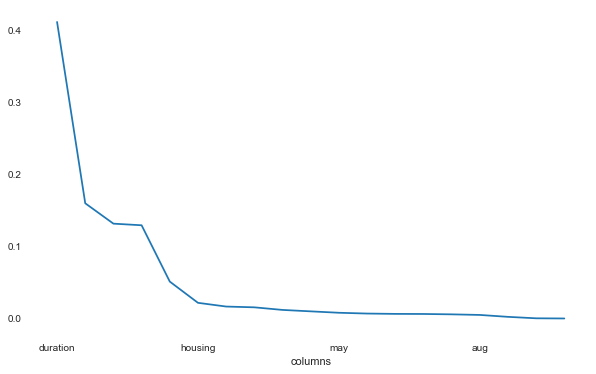

In [76]:
feature_importance.plot('columns', 'importance', figsize=(10,6), legend=False)

In [77]:
def plot_feature_importance(fi): 
    return fi.plot('columns', 'importance', 'barh', figsize=(12,7), legend=False)

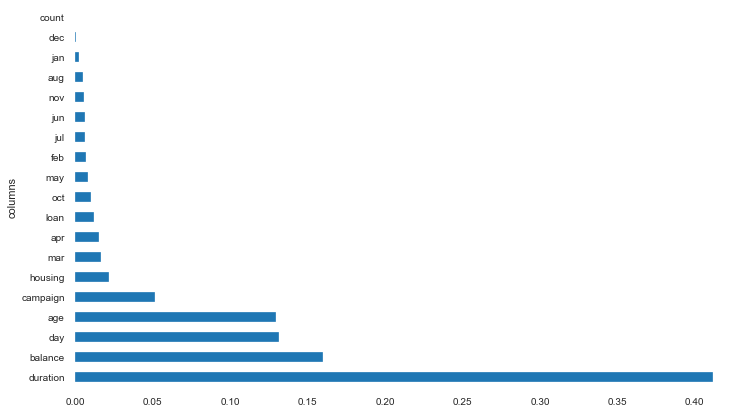

In [78]:
plot_feature_importance(feature_importance[:30])

In [79]:
# Katsayısı 0.01 den büyük olanları aldım.
keep_columns = feature_importance[feature_importance["importance"]>0.01]["columns"]; 
len(keep_columns)

9

In [83]:
def split_vals(a,n):
    return a[:n], a[n:]

In [85]:
df_keep = X_train[keep_columns].copy()
x, x_valid = split_vals(df_keep, 10000)

In [86]:
y, y_valid = split_vals(y_train, 10000)

In [87]:
y

28539    0
39255    0
34375    0
34521    0
30393    0
        ..
20349    0
37330    1
13910    1
26667    0
27851    0
Name: y, Length: 10000, dtype: int32

In [95]:
m = RandomForestClassifier(n_estimators=50, min_samples_leaf=3, max_features=0.5,
                          n_jobs=-1, oob_score=True)
m.fit(x, y)
accuracies = cross_val_score(estimator=m,X= x, y= y, cv=5)
print('Cross Val Acc (mean) : ', accuracies.mean())
y_pred = m.predict(x)
print("Classification Report")
print(metrics.classification_report(y,y_pred))
print('Confusion Matrix : ')
print(confusion_matrix(y,y_pred))

Cross Val Acc (mean) :  0.9301999999999999
Classification Report
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      9252
           1       0.97      0.68      0.80       748

    accuracy                           0.97     10000
   macro avg       0.97      0.84      0.89     10000
weighted avg       0.97      0.97      0.97     10000

Confusion Matrix : 
[[9238   14]
 [ 241  507]]


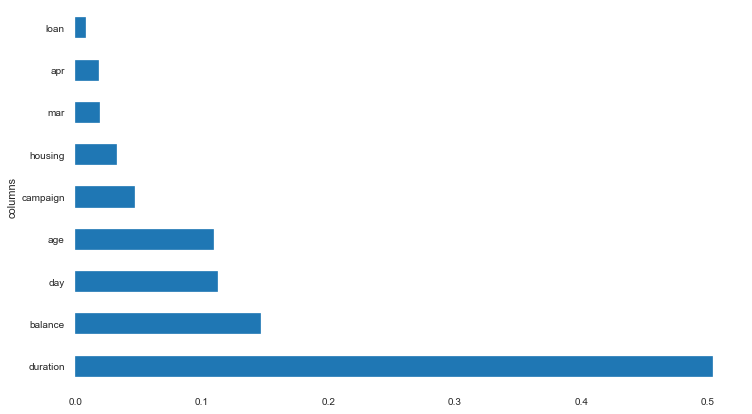

In [96]:
feature_importance = rf_feat_importance(m, df_keep)
plot_feature_importance(feature_importance);

In [144]:
print('-o-'*40)
print('-o-'*40)
print('-o-'*40)

-o--o--o--o--o--o--o--o--o--o--o--o--o--o--o--o--o--o--o--o--o--o--o--o--o--o--o--o--o--o--o--o--o--o--o--o--o--o--o--o-
-o--o--o--o--o--o--o--o--o--o--o--o--o--o--o--o--o--o--o--o--o--o--o--o--o--o--o--o--o--o--o--o--o--o--o--o--o--o--o--o-
-o--o--o--o--o--o--o--o--o--o--o--o--o--o--o--o--o--o--o--o--o--o--o--o--o--o--o--o--o--o--o--o--o--o--o--o--o--o--o--o-


# Churn Analysis

## EDA

In [238]:
df = pd.read_csv('term-deposit-marketing-2020.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


In [239]:
df.shape

(40000, 14)

In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


In [241]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,40000.0,40.544600,9.641776,19.0,33.0,39.0,48.0,95.0
balance,40000.0,1274.277550,2903.769716,-8019.0,54.0,407.0,1319.0,102127.0
day,40000.0,16.017225,8.278127,1.0,8.0,17.0,21.0,31.0
duration,40000.0,254.824300,259.366498,0.0,100.0,175.0,313.0,4918.0
campaign,40000.0,2.882175,3.239051,1.0,1.0,2.0,3.0,63.0


In [242]:
df.y.replace('yes',1,inplace=True)
df.y.replace('no',0,inplace=True)

In [243]:
df.groupby('marital').agg({'age':'mean'})

,age
marital,
divorced,44.812063
married,42.593947
single,34.103315


In [244]:
df.groupby('marital').agg({'y':'mean'})

,y
marital,
divorced,0.082751
married,0.060609
single,0.094315


In [245]:
df.groupby('job').agg({'y':'mean','duration':'mean'})

,y,duration
job,,
admin,0.078296,248.872853
blue-collar,0.057018,262.297453
entrepreneur,0.062633,255.159431
housemaid,0.048758,243.590616
management,0.082782,249.269900
retired,0.105080,257.075157
self-employed,0.079208,266.775813
services,0.060870,257.636573
student,0.156489,238.671756


In [246]:
df.y.value_counts()

0    37104
1     2896
Name: y, dtype: int64

In [247]:
churn = df[df.y==0]
churn.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,0


In [248]:
churn.shape

(37104, 14)

In [249]:
churn.groupby('job').agg({'y':'count'})

,y
job,
admin,4132
blue-collar,8848
entrepreneur,1317
housemaid,1034
management,7490
retired,1286
self-employed,1302
services,3672
student,442


In [250]:
churn.groupby('marital').agg({'y':'count'})

,y
marital,
divorced,4334
married,22908
single,9862


In [251]:
churn.groupby('education').agg({'y':'count'})

,y
education,
primary,5917
secondary,19575
tertiary,10177
unknown,1435


In [252]:
churn.groupby('housing').agg({'y':'count'})

,y
housing,
no,14537
yes,22567


In [253]:
non_churn.groupby('loan').agg({'y':'count'})

,y
loan,
no,2516
yes,380


In [254]:
# Non-Churn 
non_churn = df[df.y==1]
non_churn.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
83,59,admin,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,1
86,56,admin,married,secondary,no,45,no,no,unknown,5,may,1467,1,1
87,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,1
129,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,1
168,54,admin,married,tertiary,no,184,no,no,unknown,5,may,673,2,1


In [255]:
non_churn.shape

(2896, 14)

In [256]:
non_churn.groupby('job').agg({'y':'count'})

,y
job,
admin,351
blue-collar,535
entrepreneur,88
housemaid,53
management,676
retired,151
self-employed,112
services,238
student,82


In [257]:
non_churn.groupby('marital').agg({'y':'count'})

,y
marital,
divorced,391
married,1478
single,1027


In [258]:
non_churn.groupby('education').agg({'y':'count'})

,y
education,
primary,353
secondary,1418
tertiary,1029
unknown,96


In [259]:
non_churn.groupby('housing').agg({'y':'count'})

,y
housing,
no,1432
yes,1464


In [260]:
non_churn.groupby('loan').agg({'y':'count'})

,y
loan,
no,2516
yes,380


In [261]:
print('-o-'*40)

-o--o--o--o--o--o--o--o--o--o--o--o--o--o--o--o--o--o--o--o--o--o--o--o--o--o--o--o--o--o--o--o--o--o--o--o--o--o--o--o-


In [262]:
df.groupby(['loan','marital']).agg({'y':'count'})

y
loan marital        
no   divorced   3830
     married   19920
     single     9320
yes  divorced    895
     married    4466
     single     1569

In [263]:
rp.summary_cont(df[['age','balance','duration','campaign']])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,age,40000.0,40.5446,9.6418,0.0482,40.4501,40.6391
1,balance,40000.0,1274.2776,2903.7697,14.5188,1245.8203,1302.7348
2,duration,40000.0,254.8243,259.3665,1.2968,252.2825,257.3661
3,campaign,40000.0,2.8822,3.2391,0.0162,2.8504,2.9139


In [264]:
rp.summary_cat(df[['job','marital','education','housing','loan','contact','month']])

,Variable,Outcome,Count,Percent
0,job,blue-collar,9383,23.46
1,,management,8166,20.42
2,,technician,6852,17.13
3,,admin,4483,11.21
4,,services,3910,9.78
5,,retired,1437,3.59
6,,self-employed,1414,3.54
7,,entrepreneur,1405,3.51
8,,unemployed,1104,2.76
9,,housemaid,1087,2.72


In [265]:
df.groupby(['job','marital']).agg({'balance':'mean','y':'count'})

balance     y
job           marital                    
admin         divorced   828.989706   680
              married   1202.133733  2333
              single     977.253061  1470
blue-collar   divorced   763.171233   730
              married   1091.516644  6759
              single    1046.097149  1894
entrepreneur  divorced  1101.115152   165
              married   1614.268173  1018
              single     970.094595   222
housemaid     divorced  1567.787500   160
              married   1201.714815   810
              single    1866.538462   117
management    divorced  1522.499018  1018
              married   1752.872948  4691
              single    1632.889296  2457
retired       divorced   998.073801   271
              married   1650.358595  1082
              single    1417.071429    84
self-employed divorced  1637.000000   124
              married   1558.524483   919
              single    1360.727763   371
services      divorced   838.853933   534
              married   1055.181264  2295
              single     881.797410  1081
student       divorced   819.250000     4
              married    830.450000    40
              single    1330.875000   480
technician    divorced   899.400685   876
              married   1234.450124  3639
              single    1239.841677  2337
unemployed    divorced  1397.331081   148
              married   1485.667717   635
              single    1393.352025   321
unknown       divorced  1800.933333    15
              married   1735.969697   165
              single    1467.963636    55

In [266]:
df['new_age'] = pd.qcut(df['age'],5)
df.groupby('new_age')['y'].value_counts()

new_age         y
(18.999, 32.0]  0    8694
                1     880
(32.0, 36.0]    0    6384
                1     485
(36.0, 42.0]    0    7405
                1     513
(42.0, 50.0]    0    7603
                1     484
(50.0, 95.0]    0    7018
                1     534
Name: y, dtype: int64

In [267]:
df.groupby(['marital','new_age'])['y'].value_counts()

marital   new_age         y
divorced  (18.999, 32.0]  0     351
                          1      37
          (32.0, 36.0]    0     583
                          1      56
          (36.0, 42.0]    0     914
                          1      74
          (42.0, 50.0]    0    1195
                          1      97
          (50.0, 95.0]    0    1291
                          1     127
married   (18.999, 32.0]  0    3447
                          1     239
          (32.0, 36.0]    0    3728
                          1     246
          (36.0, 42.0]    0    4887
                          1     298
          (42.0, 50.0]    0    5549
                          1     321
          (50.0, 95.0]    0    5297
                          1     374
single    (18.999, 32.0]  0    4896
                          1     604
          (32.0, 36.0]    0    2073
                          1     183
          (36.0, 42.0]    0    1604
                          1     141
          (42.0, 50.0]    0     859


In [268]:
df.corr()

,age,balance,day,duration,campaign,y
age,1.000000,0.081517,-0.011689,-0.036270,0.016204,-0.020273
balance,0.081517,1.000000,0.011662,0.014072,-0.008137,0.030232
day,-0.011689,0.011662,1.000000,-0.032983,0.165429,-0.006420
duration,-0.036270,0.014072,-0.032983,1.000000,-0.088387,0.461169
campaign,0.016204,-0.008137,0.165429,-0.088387,1.000000,-0.040350
y,-0.020273,0.030232,-0.006420,0.461169,-0.040350,1.000000


## Data Visualization

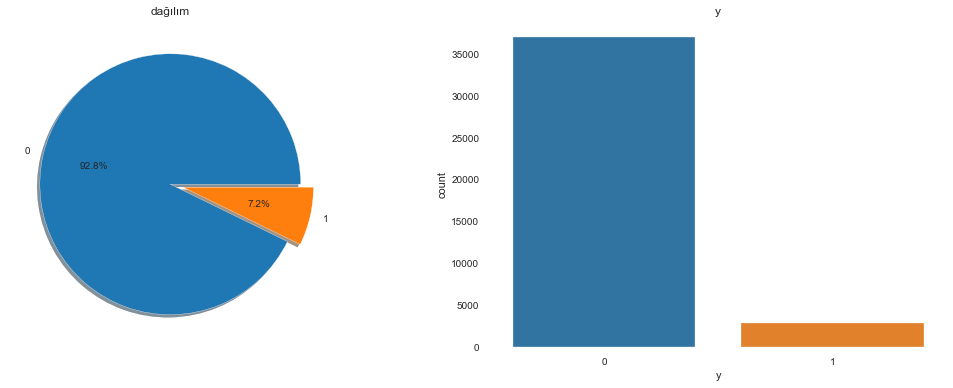

In [269]:
f,ax=plt.subplots(1,2,figsize=(18,6))
df['y'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('dağılım')
ax[0].set_ylabel('')
sns.countplot('y',data=df,ax=ax[1])
ax[1].set_title('y')
plt.show()

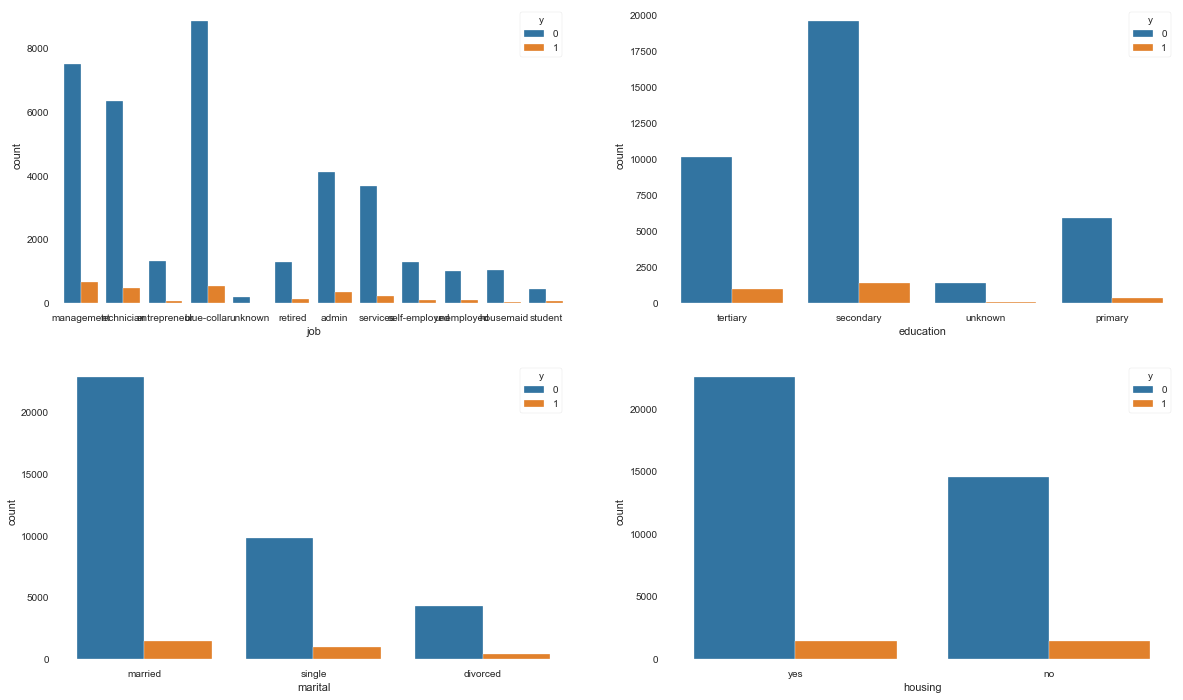

In [270]:
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='job', hue = 'y',data = df, ax=axarr[0][0])
sns.countplot(x='education', hue = 'y',data = df, ax=axarr[0][1])
sns.countplot(x='marital', hue = 'y',data = df, ax=axarr[1][0])
sns.countplot(x='housing', hue = 'y',data = df, ax=axarr[1][1])

In [271]:
fig = px.pie(df, values =df.groupby("marital")["y"].value_counts(), names = ["married-0","married-1","single-0","single-1","divorced-0","divorced-1"])
fig.show()

In [272]:
fig = px.bar(df,y = "y", x = "age" , color = "job")
fig.show()

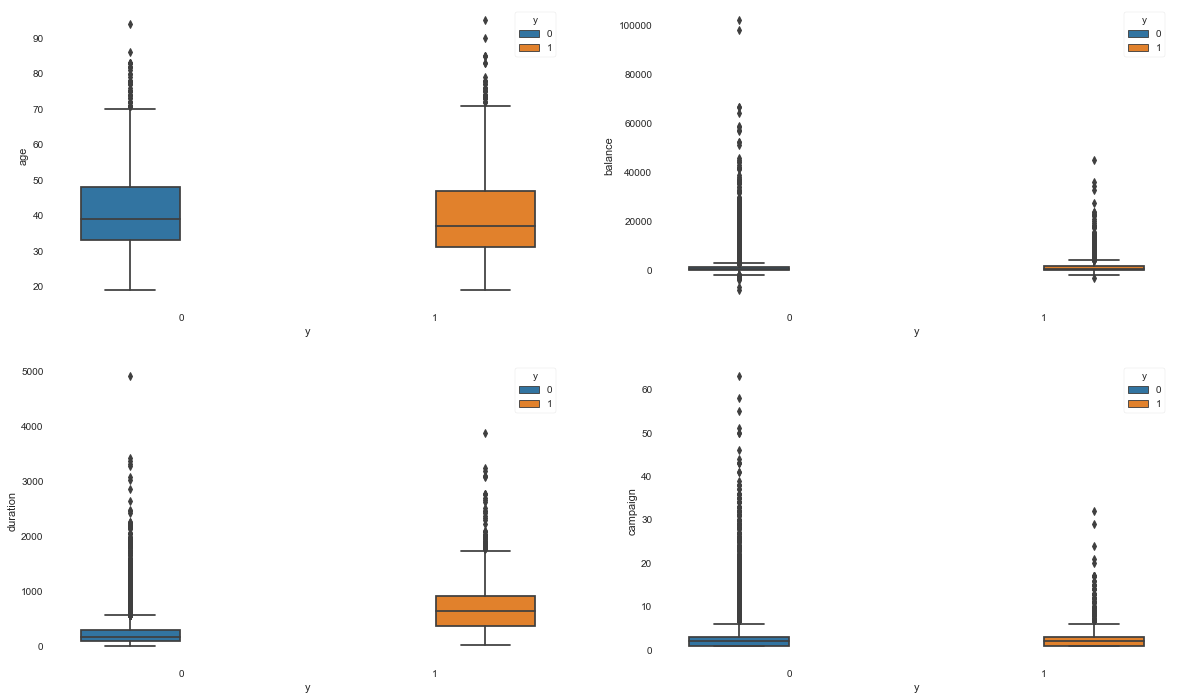

In [273]:
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.boxplot(y='age',x = 'y', hue = 'y',data = df, ax=axarr[0][0])
sns.boxplot(y='balance',x = 'y', hue = 'y',data = df , ax=axarr[0][1])
sns.boxplot(y='duration',x = 'y', hue = 'y',data = df, ax=axarr[1][0])
sns.boxplot(y='campaign',x = 'y', hue = 'y',data = df, ax=axarr[1][1])

## Data Preprcessing

### Feature Engineering

In [274]:
df.drop('new_age',axis=1, inplace=True)

In [275]:
df.drop('default',axis=1,inplace=True)

In [276]:
df["balance_score"] = pd.qcut(df['balance'].rank(method="first"), 10, labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
df["duration_score"] = pd.qcut(df['duration'].rank(method="first"), 10, labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
df["campaign_score"] = pd.qcut(df['campaign'].rank(method="first"), 10, labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

### One-Hot-Encoding & Label Encoding

In [277]:
df = pd.get_dummies(df, columns =["job", "marital","education","month"], drop_first = True)

In [278]:
df.contact = df.contact.replace({'unknown':0,'cellular':1,'telephone':2})

In [279]:
df.housing = df.housing.replace({'yes':1,'no':0})
df.loan = df.loan.replace({'yes':1,'no':0})

### Scaling 

In [281]:
cat_df = df[['balance_score','duration_score','campaign_score']]
cat_df.head()

,balance_score,duration_score,campaign_score
0,9,7,1
1,3,5,1
2,2,2,1
3,8,3,1
4,2,6,1


In [282]:
y = df.y
X = df.drop(['y','balance_score','duration_score','campaign_score'],axis=1)
cols = X.columns
index = X.index
X.head()

,age,balance,housing,loan,contact,day,duration,campaign,job_blue-collar,job_entrepreneur,...,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct
0,58,2143,1,0,0,5,261,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,44,29,1,0,0,5,151,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,33,2,1,1,0,5,76,1,0,1,...,0,0,0,0,0,0,0,1,0,0
3,47,1506,1,0,0,5,92,1,1,0,...,0,0,0,0,0,0,0,1,0,0
4,33,1,0,0,0,5,198,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [283]:
transformer = RobustScaler().fit(X)
X=transformer.transform(X)
X=pd.DataFrame(X,columns=cols,index=index)

In [284]:
X = pd.concat([X,cat_df],axis=1)
X.head()

,age,balance,housing,loan,contact,day,duration,campaign,job_blue-collar,job_entrepreneur,...,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,balance_score,duration_score,campaign_score
0,1.266667,1.372332,0.0,0.0,-1.0,-0.923077,0.403756,-0.5,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9,7,1
1,0.333333,-0.298814,0.0,0.0,-1.0,-0.923077,-0.112676,-0.5,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3,5,1
2,-0.400000,-0.320158,0.0,1.0,-1.0,-0.923077,-0.464789,-0.5,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,2,1
3,0.533333,0.868775,0.0,0.0,-1.0,-0.923077,-0.389671,-0.5,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8,3,1
4,-0.400000,-0.320949,-1.0,0.0,-1.0,-0.923077,0.107981,-0.5,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,6,1


### Train - Test Split & Balancing

In [285]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6)

### Modelling

In [290]:
models = []
models.append(('LR', LogisticRegression(random_state = 12345)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state = 12345)))
models.append(('RF', RandomForestClassifier(random_state = 12345)))
models.append(('SVM', SVC(gamma='auto', random_state = 12345)))
models.append(('XGB', GradientBoostingClassifier(random_state = 12345)))
models.append(("LightGBM", LGBMClassifier(random_state = 12345)))

# evaluate each model in turn
results = []
names = []

### Accuracy Score

In [291]:
for name, model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        msg = "%s: (%f)" % (name, accuracy)
        print(msg)

C:\Users\senol\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LR: (0.933625)
KNN: (0.930250)
CART: (0.915875)
RF: (0.938625)
SVM: (0.933250)
XGB: (0.939875)
LightGBM: (0.939750)


In [293]:
models2 = []
models2.append(('CART', DecisionTreeClassifier( random_state = 12345)))
models2.append(('RF', RandomForestClassifier( random_state = 12345)))
models2.append(('XGB', GradientBoostingClassifier( random_state = 12345)))
models2.append(("LightGBM", LGBMClassifier( random_state = 12345)))

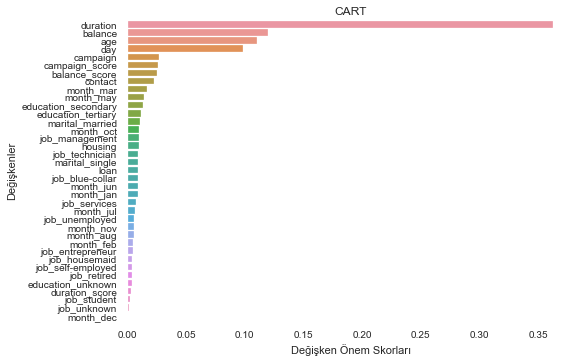

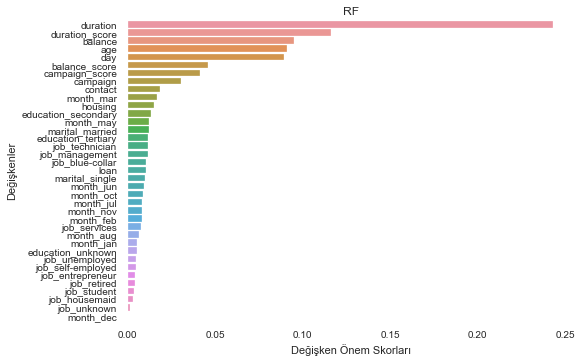

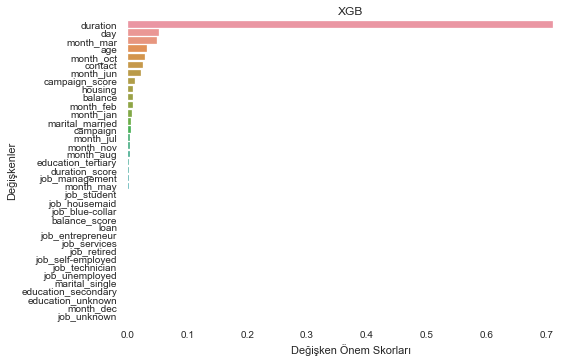

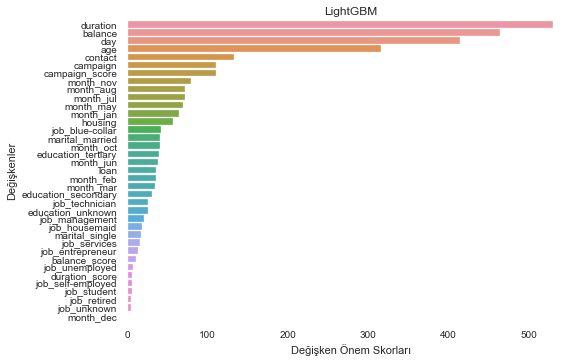

In [294]:
for name, model in models2:
        base = model.fit(X_train,y_train)
        y_pred = base.predict(X_test)
        acc_score = accuracy_score(y_test, y_pred)
        feature_imp = pd.Series(base.feature_importances_,
                        index=X.columns).sort_values(ascending=False)

        sns.barplot(x=feature_imp, y=feature_imp.index)
        plt.xlabel('Değişken Önem Skorları')
        plt.ylabel('Değişkenler')
        plt.title(name)
        plt.show()

## Model Tuning 

In [296]:
models = []
models.append(('XGB', GradientBoostingClassifier(random_state = 12345,learning_rate = 0.05, max_depth = 5, min_samples_split = 2, n_estimators = 500, subsample = 0.8)))
models.append(("LightGBM", LGBMClassifier(random_state = 12345,  learning_rate = 0.05, max_depth = 3, n_estimators = 1000)))

# evaluate each model in turn
results = []
names = []

for name, model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        msg = "%s: (%f)" % (name, accuracy)
        print(msg)

XGB: (0.941125)
LightGBM: (0.940500)


## Model Tuning Variable Importance Level

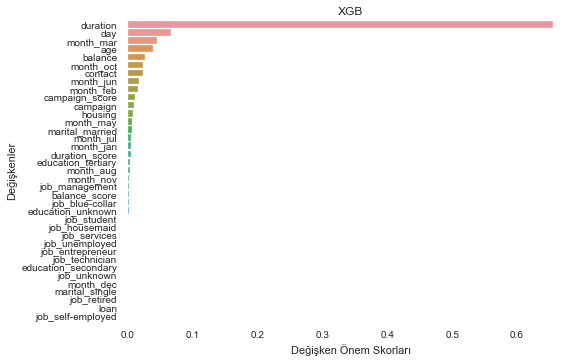

In [297]:
models2 = []
models2.append(("XGB", GradientBoostingClassifier(random_state = 12345,  learning_rate = 0.05, max_depth = 3, n_estimators = 1000)))

# evaluate each model in turn
results = []
names = []

for name, model in models2:
        base = model.fit(X_train,y_train)
        y_pred = base.predict(X_test)
        acc_score = accuracy_score(y_test, y_pred)
        feature_imp = pd.Series(base.feature_importances_,
                        index=X.columns).sort_values(ascending=False)

        sns.barplot(x=feature_imp, y=feature_imp.index)
        plt.xlabel('Değişken Önem Skorları')
        plt.ylabel('Değişkenler')
        plt.title(name)
        plt.show()

## Confusion Matrix

In [299]:
y_pred = model.predict(X_test)
cm_xgb = confusion_matrix(y_test, y_pred=y_pred)

TP = cm_xgb[1, 1]
TN = cm_xgb[0, 0]
FP = cm_xgb[0, 1]
FN = cm_xgb[1, 0]

In [301]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.rcParams.update({'font.size': 19})
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title,fontdict={'size':'16'})
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45,fontsize=12,color="blue")
    plt.yticks(tick_marks, classes,fontsize=12,color="blue")
    rc('font', weight='bold')
    fmt = '.1f'
    thresh = cm.max()
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="red")

    plt.ylabel('True label',fontdict={'size':'16'})
    plt.xlabel('Predicted label',fontdict={'size':'16'})
    plt.tight_layout()

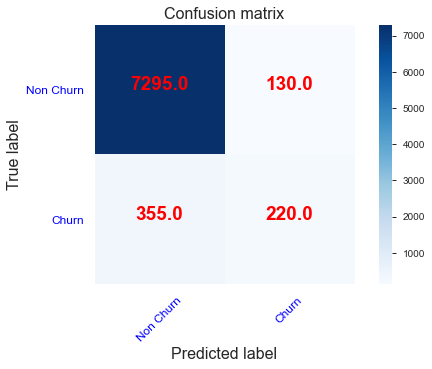

In [303]:
plot_confusion_matrix(confusion_matrix(y_test, y_pred=y_pred), classes=['Non Churn','Churn'],
                      title='Confusion matrix')

In [304]:
tn, fp, fn, tp = cm_xgb.ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  7295
False Positives:  130
False Negatives:  355
True Positives:  220


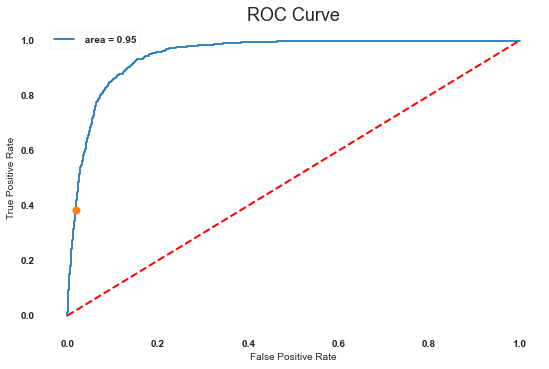

In [307]:
lbgm_tuned = model
y_pred_prob = lbgm_tuned.predict_proba(X_test)[:,1]
fig, ax = plt.subplots()
fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr,tpr)
ax.plot(fpr,tpr, label = " area = {:0.2f}".format(roc_auc))
ax.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
ax.set_xlabel("False Positive Rate", fontsize = 10)
ax.set_ylabel("True Positive Rate", fontsize = 10)
ax.set_title("ROC Curve", fontsize = 18)
ax.legend(loc = 'best')

close_default = np.argmin(np.abs(thresholds_roc - 0.5))
ax.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
plt.tight_layout()

Churn analizinde izlenen adımlar: 

- Churn Data Set oku.

- EDA ile Veri setinin yapısal verileri kontrol edildi. Verikümesindeki değişken türleriincelendi, boyut bilgilerine erişildi. Veri setinin tanımlayıcı istatistikleri incelendi.

- Veriler çeşitli amaçlara yönelik analizler için görselleştirildi.

- Veriler sınıflandırmaya uygun hale getirildi. Encoding, Scaling işlemleri yapıldı.

- Model oluştururken; KNN, SVM, CART, Random Forest, XGBoost, LightGBM gibi sınıflandırma algoritmalaritmaları kullanılarak accuracy skoru hesaplandı. Accuracy skoru yükseltmek için hiperparametre ayarlamaları yapıldı.